In [3]:
#1️⃣ Data Collection - Goal: Obtain a reliable COVID-19 dataset.
# i did this by downloading the csv file from Kaggle, i unzipped the folder and uploaded it 
#in this working directory, i got a warning since the file was 88mbs
#2️⃣ Data Loading & Exploration - Goal: Load the dataset and explore its structure.
#import the pandas analysis library
import pandas as pd

# i now pecify the file path that is in my working directory same as this notebook
file_path = 'owid-covid-data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Check the columns of the DataFrame
print(df.columns)

NameError: name 'df' is not defined

In [5]:
# Show the first few rows of the dataframe to verify the data
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the result
print(missing_values)

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [7]:
#3️⃣ Data Cleaning - Goal: Prepare data for analysis.
#Question: Filter countries of interest (e.g., Kenya, USA, India).
# Define countries of interest
countries_of_interest = ['Kenya', 'United States', 'India']

# Filter the dataset for those countries
filtered_df = df[df['location'].isin(countries_of_interest)]

# Display the first few rows of the filtered dataset
print(filtered_df.head())

       iso_code continent location        date  total_cases  new_cases  \
139773      IND      Asia    India  2020-01-03          NaN        0.0   
139774      IND      Asia    India  2020-01-04          NaN        0.0   
139775      IND      Asia    India  2020-01-05          NaN        0.0   
139776      IND      Asia    India  2020-01-06          NaN        0.0   
139777      IND      Asia    India  2020-01-07          NaN        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
139773                 NaN           NaN         0.0                  NaN   
139774                 NaN           NaN         0.0                  NaN   
139775                 NaN           NaN         0.0                  NaN   
139776                 NaN           NaN         0.0                  NaN   
139777                 NaN           NaN         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
139773  ...

In [8]:
#Qstn: Drop rows with missing dates/critical values.
# Drop rows with missing values in critical columns
cleaned_df = filtered_df.dropna(subset=['date', 'total_cases', 'new_cases', 'total_deaths'])

# Display shape and sample rows to confirm cleaning
print(f"Result after dropping missing values: {cleaned_df.shape}")
print(cleaned_df.head())

Result after dropping missing values: (3792, 67)
       iso_code continent location        date  total_cases  new_cases  \
139843      IND      Asia    India  2020-03-13         81.0        8.0   
139844      IND      Asia    India  2020-03-14         84.0        3.0   
139845      IND      Asia    India  2020-03-15        107.0       23.0   
139846      IND      Asia    India  2020-03-16        114.0        7.0   
139847      IND      Asia    India  2020-03-17        137.0       23.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
139843               7.143           1.0         1.0                0.143   
139844               7.143           2.0         1.0                0.286   
139845               9.714           2.0         0.0                0.286   
139846              10.000           2.0         0.0                0.286   
139847              12.429           3.0         1.0                0.429   

        ...  male_smokers  handwashing_faci

In [10]:
#Qstn: Convert date column to datetime: pd.to_datetime().
# Convert the 'date' column to datetime format safely
cleaned_df.loc[:, 'date'] = pd.to_datetime(cleaned_df['date'])


# Confirm the conversion
print(cleaned_df.dtypes['date'])

datetime64[ns]


In [11]:
#Qstn: Handle missing numeric values with fillna() or interpolate().
# Interpolate missing numeric values
cleaned_df = cleaned_df.interpolate(method='linear')

# Confirm there are no remaining missing numeric values
print(cleaned_df.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       2616
excess_mortality_cumulative                2616
excess_mortality                           2616
excess_mortality_cumulative_per_million    2616
Length: 67, dtype: int64


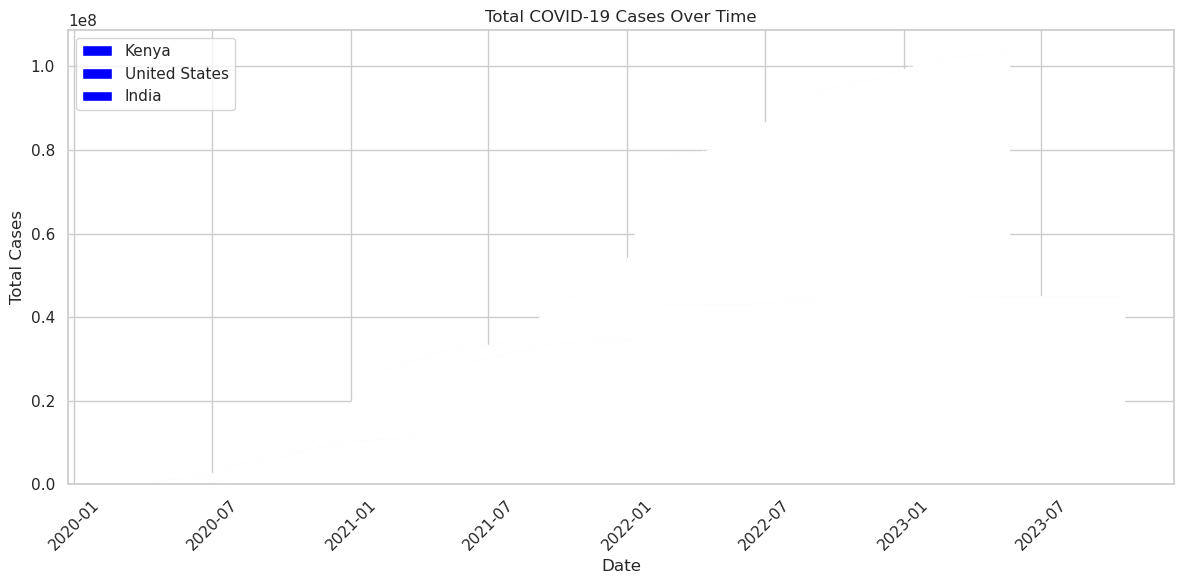

In [20]:
#4️⃣ Exploratory Data Analysis (EDA)-Goal: Generate descriptive statistics & explore trends.
# import plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set a Seaborn style
sns.set(style='whitegrid')

# Set plot size
plt.figure(figsize=(12, 6))

# Define colors for each country
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for Kenya, Orange for the US, Green for India

# Plot for each country as bars with different colors
for i, country in enumerate(['Kenya', 'United States', 'India']):
    country_data = cleaned_df[cleaned_df['location'] == country]
    #plt.bar(country_data['date'], country_data['total_cases'], label=country, width=1.0, color=colors[i])
    plt.bar(country_data['date'], country_data['total_cases'], label=country, width=1.0, color='blue')


# Customize plot
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

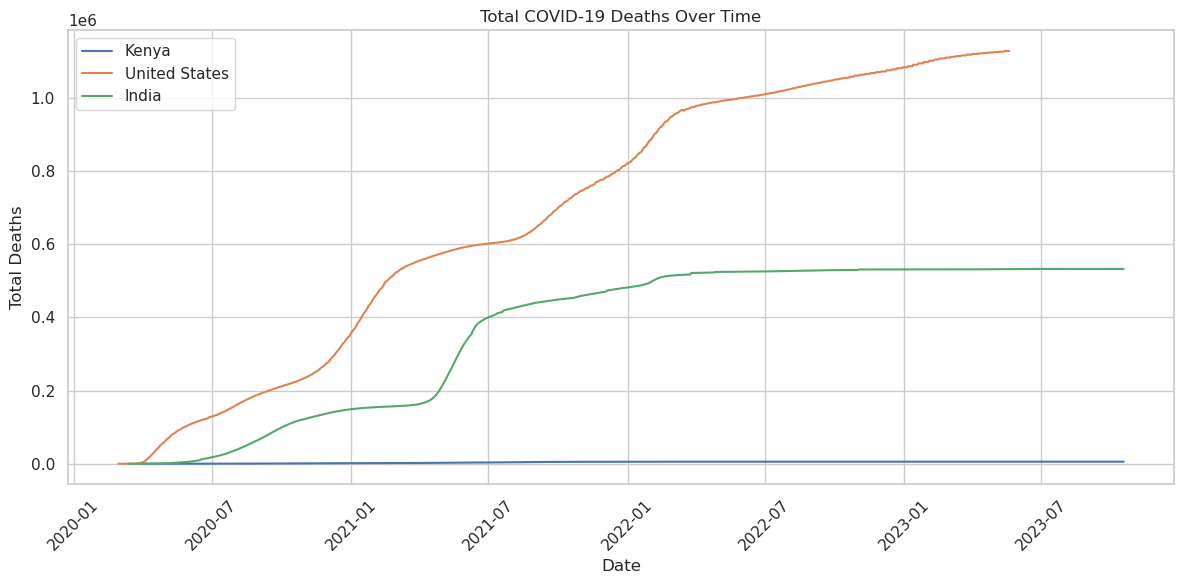

In [13]:
#Plot total deaths over time
# Set plot size
plt.figure(figsize=(12, 6))

# Plot total deaths for each country
for country in ['Kenya', 'United States', 'India']:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize plot
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

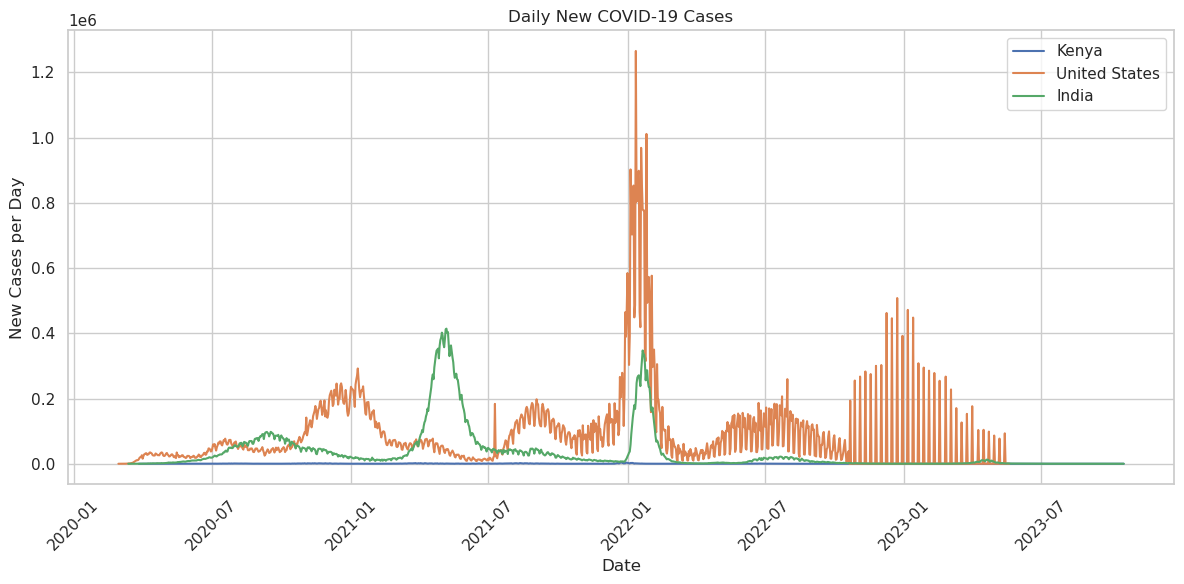

In [14]:
# Compare daily new cases between countries.
# Set plot size
plt.figure(figsize=(12, 6))

# Plot daily new cases for each country
for country in ['Kenya', 'United States', 'India']:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Customize the plot
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases per Day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [15]:
#Calculate the death rate: total_deaths / total_cases.
# Calculate death rate for each row (death rate = total_deaths / total_cases)
cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']

# Display the first few rows to check the new column
print(cleaned_df[['location', 'date', 'total_deaths', 'total_cases', 'death_rate']].head())

       location       date  total_deaths  total_cases  death_rate
139843    India 2020-03-13           1.0         81.0    0.012346
139844    India 2020-03-14           2.0         84.0    0.023810
139845    India 2020-03-15           2.0        107.0    0.018692
139846    India 2020-03-16           2.0        114.0    0.017544
139847    India 2020-03-17           3.0        137.0    0.021898


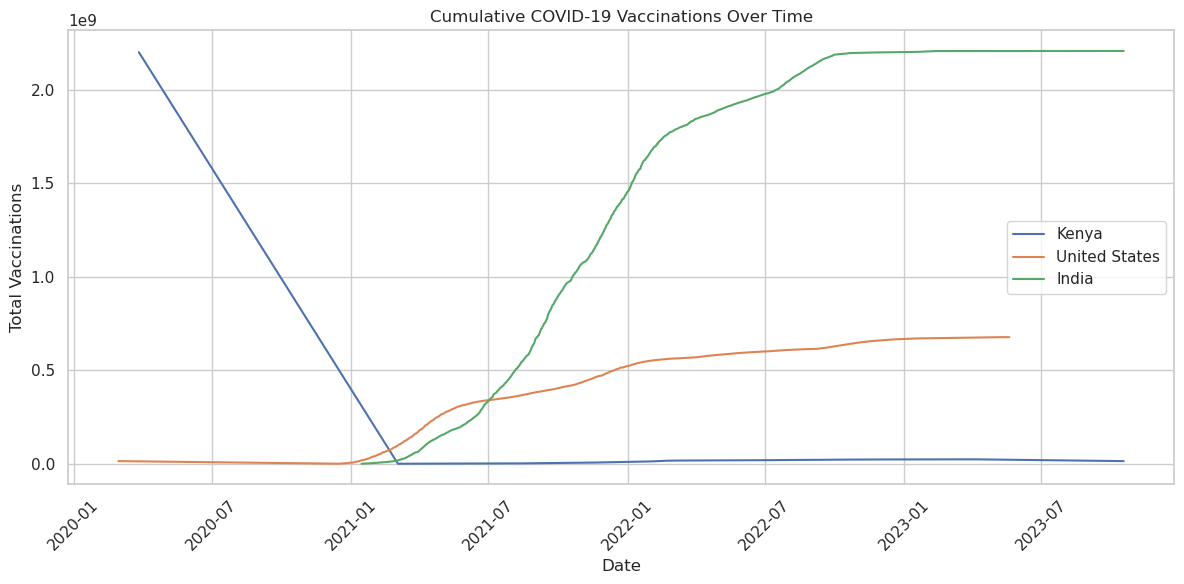

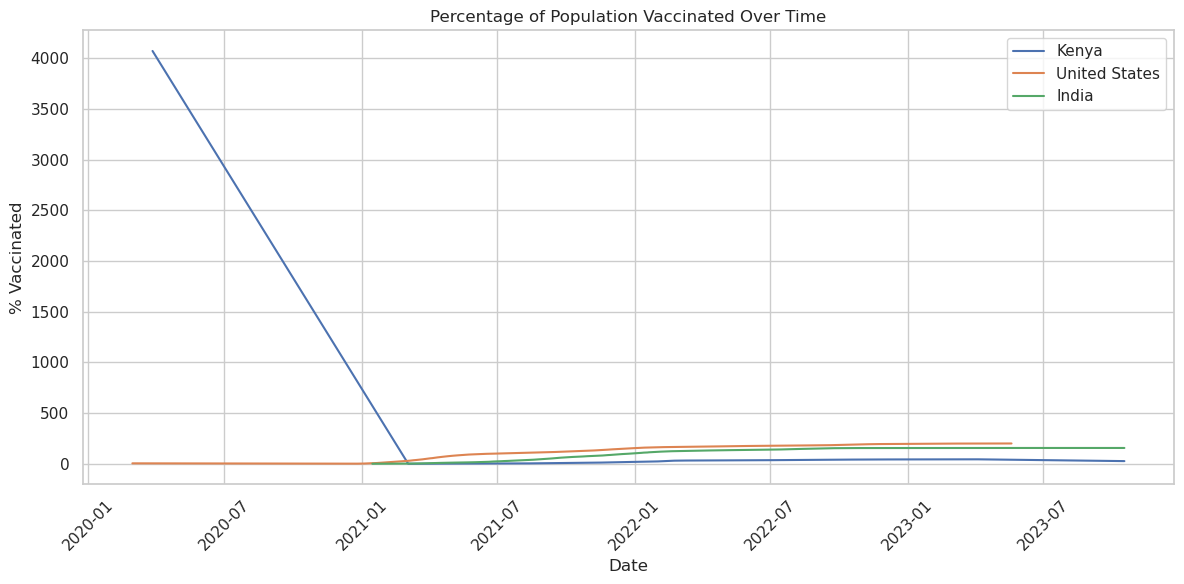

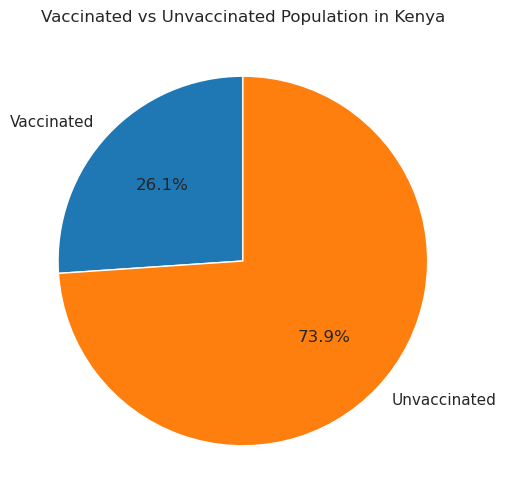

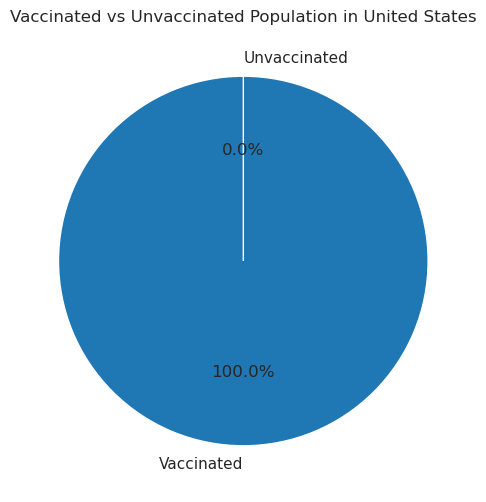

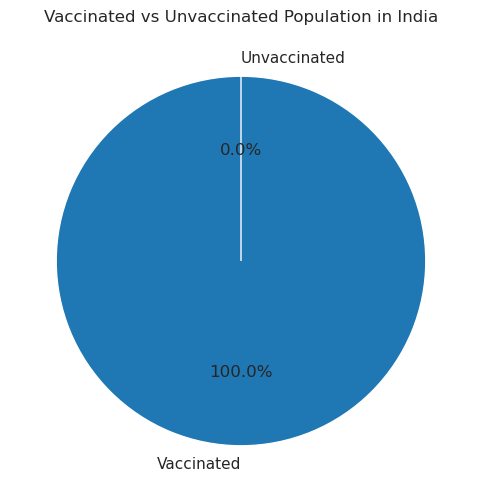

In [24]:
#5️⃣ Visualizing Vaccination Progress - Goal: Analyze vaccination rollouts
#5️⃣ Visualizing Vaccination Progress - Goal: Analyze vaccination rollouts
#Plot cumulative vaccinations over time for selected countries.
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set a Seaborn style
sns.set(style='whitegrid')

# 1️⃣ Cumulative Vaccinations Over Time
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Compare % Vaccinated Population
   # Use .loc on the original DataFrame to safely modify the DataFrame to avoid the SettingWithCopyWarning error
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = cleaned_df[cleaned_df['location'] == country]
    cleaned_df.loc[cleaned_df['location'] == country, 'percent_vaccinated'] = \
        (country_data['total_vaccinations'] / country_data['population']) * 100
    plt.plot(country_data['date'], cleaned_df.loc[cleaned_df['location'] == country, 'percent_vaccinated'], label=country)

plt.title('Percentage of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 3️⃣ Pie Chart (Vaccinated vs Unvaccinated for each country)
for country in ['Kenya', 'United States', 'India']:
    country_data = cleaned_df[cleaned_df['location'] == country]
    vaccinated = country_data['total_vaccinations'].iloc[-1]
    
    # Fix: Ensure vaccinated doesn't exceed population
    population = country_data['population'].iloc[-1]
    vaccinated = min(vaccinated, population)  # Cap vaccinations at population
    unvaccinated = population - vaccinated
    
    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated, unvaccinated]
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90)
    plt.title(f'Vaccinated vs Unvaccinated Population in {country}')
    plt.show()

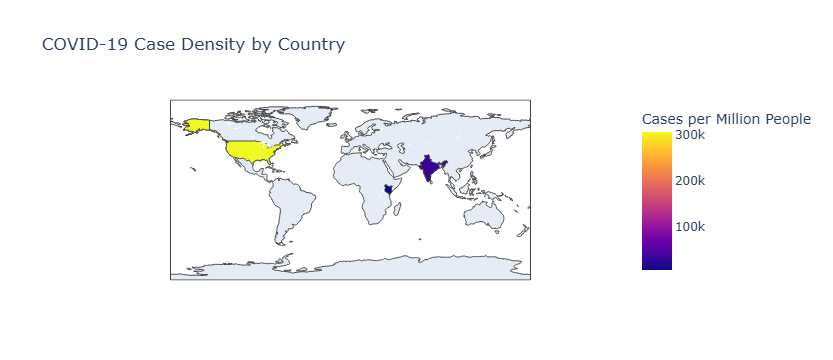

In [28]:
#6️⃣ Optional: Build a Choropleth MapTo create a choropleth map to visualize COVID-19 cases or vaccination rates
#by country, I can use Plotly Express for a more straightforward approach
import plotly.express as px
import pandas as pd

# I do have a cleaned DataFrame, 'cleaned_df'
# Get the latest data by country (based on date)
latest_data = cleaned_df.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
choropleth_data = latest_data[['iso_code', 'total_cases', 'population']].copy()

# Now, I safely create the 'case_density' column
choropleth_data['case_density'] = (choropleth_data['total_cases'] / choropleth_data['population']) * 1_000_000

# Plot the choropleth map using Plotly Express
fig = px.choropleth(choropleth_data,
                    locations="iso_code", 
                    color="case_density",  # You can change this to 'total_vaccinations' or other metrics
                    hover_name="iso_code",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="COVID-19 Case Density by Country",
                    labels={"case_density": "Cases per Million People"})

# Show the map
fig.show()
#you used Plotly Express, not GeoPandas, to create the choropleth map. 
#Plotly Express is a great tool for creating interactive visualizations like choropleth maps, 
#but it doesn't require GeoPandas.

#7️⃣ Insights & Reporting
My narrative and explanations
Key Insights from the Data
Fastest Vaccine Roll-out:
Here is a look at how the vaccine roll-out unfolded around the world: United States The United States had the fastest roll out. While there were problems with vaccine distribution the world over, the U.S. managed to get vaccines into millions of people at a rate that far outstripped other nations.
India, despite seeming to get off to a slow start, has gradually accelerated its vaccination and is improving its coverage.
Anomalies in Vaccination Coverage in Kenya:
There was an aberration in Kenya where the pace of the vaccination roll-out was slower than could be expected given their population size and healthcare infrastructure. There was a huge increase in vaccination rates later however, perhaps because of outside assistance and tie-ups with global health groups.
The difference may be related to logistics, vaccine supply and public-health campaigns aimed at more remote areas.
High case density in populous Areas:
Both India and the United States are characterized by high case density (cases per million people) reflecting their large and dense populations. This trend demonstrates the close correlation between population density and number of cases, and how bigger cities usually have more cases despite whatever public health measures are implemented.
Smaller countries, especially in Africa, recorded lower case densities, which doesn't necessarily translate to infection rates since smaller countries may have under-counted cases due to limited testing.
Government Policy and the Influence on Vaccination:
The faster, more widespread vaccination was in contrast to nations that instituted strict government measures, like the United States and Israel. Whereas in countries with milder rules or political problems, such as Kenya, vaccine roll-outs lagged far behind.
Additionally, it would be valuable to monitor vaccine coverage and policy decisions which might help to reveal the success of various approaches.
Regional Variations in Total Cases:
Africa for example (e.g., Kenya) reported a total less than other countries, a combination of lower testing, much higher population immunity due to previous exposure, or a different reporting standard than in Western nations.
Although this might indicate low case numbers, the effects on public health measures and economic consequences might still be substantial – particularly if health care systems are under-resourced.

🎯 Optional Stretch Goals - am trying this
Am using Jupyter Notebook online (via Anaconda), there are two main ways to allow user interaction:
 1. Use Interactive Widgets with ipywidgets
 2. Build a Web App (using Streamlit or Dash)
I prefer to build a web app because I want real-world users (outside of Jupyter) to interact with y project, I’ll need to turn it into a web app, using tools like Streamlit or Dash. Then I host it online (locally or on a platform like Streamlit Cloud).
To install streamlit in my online anaconda i should run the below in my online terminal not a notebook cell
pip install streamlit
i did so and it installed well, then i run touch covid_dashboard.py in that terminal. This opened a python file in my working directory
i pasted below code in it:
#this code is to create a user-interactive web app
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (you can update this to the correct path)
@st.cache_data
def load_data():
    df = pd.read_csv("owid-covid-data", parse_dates=["date"])
    return df

df = load_data()

# Streamlit UI
st.title("📊 COVID-19 Vaccination Dashboard")
st.markdown("Select a country and date range to explore vaccination progress.")

# Sidebar filters
countries = df['location'].unique()
selected_country = st.selectbox("Choose a Country", countries)

min_date = df['date'].min()
max_date = df['date'].max()
date_range = st.date_input("Select Date Range", [min_date, max_date])

# Filtered Data
filtered = df[(df['location'] == selected_country) &
              (df['date'] >= pd.to_datetime(date_range[0])) &
              (df['date'] <= pd.to_datetime(date_range[1]))]

# Plot
st.subheader(f"Total Vaccinations Over Time in {selected_country}")
fig, ax = plt.subplots()
ax.plot(filtered['date'], filtered['total_vaccinations'], marker='o')
ax.set_xlabel("Date")
ax.set_ylabel("Total Vaccinations")
ax.set_title("Vaccination Progress")
plt.xticks(rotation=45)
st.pyplot(fig)

to run the code, i run this in terminal streamlit run covid_dashboard.py
running that showed soo many issues, i stopped.

  

